In [10]:
DIR_CANCER = '/data/lunaset_split/train/cancer/*'
DIR_NCANCER = '/data/lunaset_split/train/ncancer/*'

In [11]:
import sys
sys.path.append('../')
sys.path.append('../tutorials/')

from radio import CTImagesMaskedBatch as CTIMB
from radio import dataset as ds

import matplotlib.pyplot as plt

In [12]:
cix = ds.FilesIndex(path=DIR_CANCER, dirs=True)
ncix = ds.FilesIndex(path=DIR_NCANCER, dirs=True)

cancerset = ds.Dataset(index=cix, batch_class=CTIMB)
ncancerset = ds.Dataset(index=ncix, batch_class=CTIMB)

In [7]:
from radio.pipelines import combine_crops
from utils import show_slices # function for plotting batch masks and images
combine_pipeline = combine_crops(cancerset, ncancerset, batch_sizes=(4, 4))

In [8]:
# Here we generate one batch with 4 cancer crops and 4 non-cancer crops
batch = combine_pipeline.next_batch()

TypeError: only integer scalar arrays can be converted to a scalar index

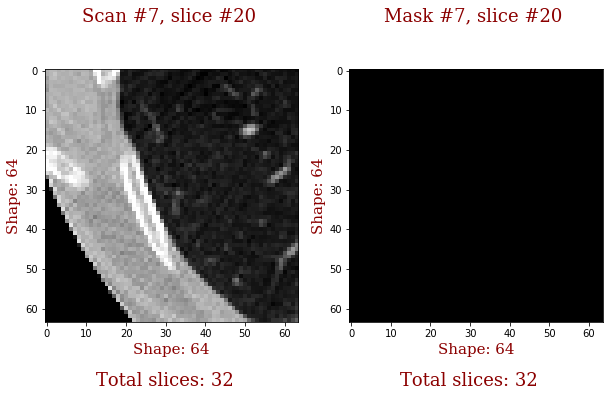

In [163]:
show_slices(batch, scan_indices=7, ns_slice=20, clims=[(0, 255), (0, 1)],
            components=('images', 'masks'), grid=False)

In [193]:
combine_pipeline = combine_crops(cancerset, ncancerset, batch_sizes=(4, 4)).mix_images(p=0.5)

In [194]:
# Here we generate one batch with 4 cancer crops and 4 non-cancer crops
batch = combine_pipeline.next_batch()

[0 2 5 6 7 1 4 3]


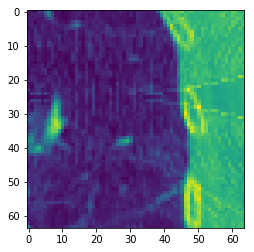

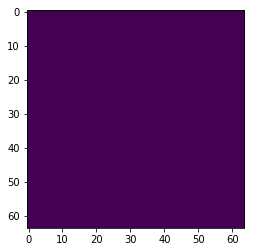

In [195]:
i = 100

plt.imshow(batch.data.images[i])
plt.show()

plt.imshow(batch.data.masks[i])
plt.show()

In [196]:
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import interactive

def plot_example_interactive(data):
    def interactive_f(i):
        plt.imshow(data[i, :, :])
        plt.show()

    interactive_plot = interactive(interactive_f, i=(0, data.shape[0]-1, 1))
    output = interactive_plot.children[-1]
    output.layout.height = '350px'
    return interactive_plot

In [197]:
plot_example_interactive(batch.data.masks)

interactive(children=(IntSlider(value=127, description='i', max=255), Output(layout=Layout(height='350px'))), _dom_classes=('widget-interact',))

In [198]:
plot_example_interactive(batch.data.images)

interactive(children=(IntSlider(value=127, description='i', max=255), Output(layout=Layout(height='350px'))), _dom_classes=('widget-interact',))